In [1]:
import sys
sys.path.append('../gefera')
import gefera as gf

In [2]:
t = np.linspace(67.8, 68.8, 1000)
#t2 = t1 + 365
#t = np.hstack((t1, t2))

ap = 1.0
tp = 0.2
ep = 0.2
pp = 365
wp = 0.1 * np.pi / 180
ip = 90.0 * np.pi / 180

am = 0.007
tm = -1.2
em = 0.1
pm = 1
om = 20 * np.pi / 180
wm = 90 * np.pi / 180
im = 88.0 * np.pi / 180
mm = 0.01

u1 = 0.5
u2 = 0.3
rp = 0.2
rm = 0.1

po = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.System(po, mo)
lc = sys.lightcurve(t, u1, u2, rp, rm)

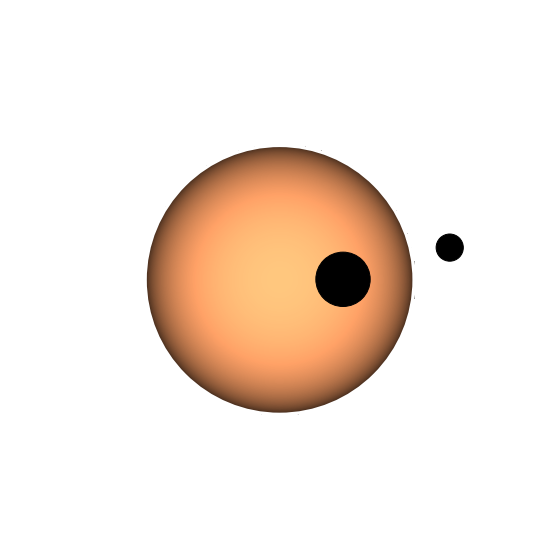

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
sys.draw(ax, t[600], rp, rm, ld_params=(0.5, 0.1))

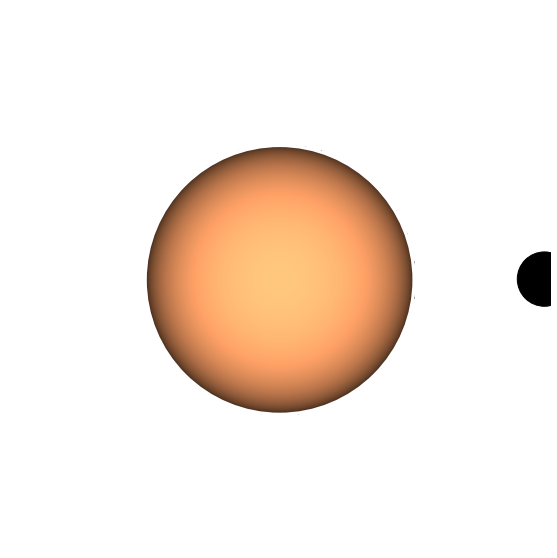

In [4]:
from IPython.display import HTML
fig = plt.figure(figsize=(10, 10))
ani = sys.animate(fig, t[::10], rp, rm, ld_params=(0.5, 0.1))
HTML(ani.to_html5_video())